In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 및 탐색
* event, product, user 데이터 차례로 탐색

## 1.1 event 데이터 EDA
* GA를 통한 29cm 사이트의 (접속 시간,기종, 위치, 플랫폼, 행동) 데이터
* 지금부터 볼 세개의 데이터셋 중 가장 중심이 되는 데이터로, 가공된 GA 로그 데이터임

In [6]:
events = pd.read_csv('C:/.../sampled_events.csv')
events

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
3,51e148afe55e6f296c0931cac6bc2c1d,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS
4,3316370366bdbd2fdff02e996c1b2721,2021-06-03 13:00:03.312001,add_to_cart,frWHEf/czsCEjklEIwxxKA==,yXpbzgtgRe37PEbJlBiKmQ==,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880402,dd2a71d30af7c856b61223bd45b54dbe,2021-08-04 12:59:53.129054,click_item,ROKDMwVDKbb9N82CptJ9dg==,xKvqk3vRvFLpCTQTqpL4ew==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeongsangnam-do,IOS
5880403,1006525137f948b588322af3ffe4f7ec,2021-08-04 12:59:56.151,click_item,0nfvwBd9Qriig0lIgvtiBA==,1qWgJ5SJvbi5+mBYGH848A==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeongsangnam-do,IOS
5880404,5ca46d4d8ffc29bad42d8b6fc830e364,2021-08-04 12:59:56.952028,click_item,Z0a8cvN+t0V2WInGzjkM5Q==,M9ucsQ4dNX/t1Bopo599BA==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeonggi-do,IOS
5880405,184c25447f47b4c831a9771801381577,2021-08-04 12:59:58.019142,click_item,vQeO3FiA+W7bmyu2tdKuGg==,W/LoA3I9ym6wowhAdCsUvA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Busan,ANDROID


In [9]:
events.shape

(5880407, 13)

In [7]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880407 entries, 0 to 5880406
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   event_timestamp           object
 2   event_name                object
 3   user_no                   object
 4   item_no                   object
 5   device_type               object
 6   mobile_brand_name         object
 7   mobile_model_name         object
 8   mobile_marketing_name     object
 9   operating_system_version  object
 10  country                   object
 11  region                    object
 12  platform                  object
dtypes: object(13)
memory usage: 583.2+ MB


In [95]:
# 컬럼별 결측치 확인
events.isna().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
dtype: int64

In [12]:
len(events['session_id'].unique())
# 588만행 데이터 중 142만개의 고유 세션

1425915

In [15]:
print(min(events['event_timestamp']))
print(max(events['event_timestamp']))
# 데이터기간, 2개월

2021-06-03 13:00:01.845
2021-08-04 12:59:59.284045


In [91]:
events['event_name'].value_counts()
# 클릭, 구매, 장바구니, 찜 4가지 종류

click_item          4845691
purchase_success     465253
add_to_cart          353143
like_item            216320
Name: event_name, dtype: int64

In [16]:
len(events['user_no'].unique())
# 588만 행, 42만개 세션, 25만명 유저

254958

In [17]:
len(events['item_no'].unique())
# 28만여개 제품

283326

In [92]:
events['device_type'].value_counts()
# 디바이스는 모바일과 태블릿만 수집된 데이터

mobile    5853335
tablet      27072
Name: device_type, dtype: int64

In [96]:
events['mobile_brand_name'].value_counts(dropna=False)
# 애플과 삼성이 주류

Apple         4241405
Samsung       1535668
LG              90532
NaN              3594
Xiaomi           3245
BlackBerry       2261
Google           1642
Huawei            615
Sony              449
OnePlus           377
OPPO              114
Vivo              110
Amazon            105
Sharp              96
Luna               59
Pantech            58
Nokia              36
Razer              33
Asus                4
Meizu               4
Name: mobile_brand_name, dtype: int64

In [31]:
sorted(events['operating_system_version'].unique())
# 안드로이드와 iOS의 다양한 버전

['Android 10',
 'Android 11',
 'Android 12',
 'Android 6.0',
 'Android 6.0.1',
 'Android 7.0',
 'Android 7.1.1',
 'Android 7.1.2',
 'Android 8.0.0',
 'Android 8.1.0',
 'Android 9',
 'iOS 11.0.1',
 'iOS 11.0.2',
 'iOS 11.0.3',
 'iOS 11.1.1',
 'iOS 11.1.2',
 'iOS 11.2',
 'iOS 11.2.1',
 'iOS 11.2.5',
 'iOS 11.2.6',
 'iOS 11.3',
 'iOS 11.3.1',
 'iOS 11.4',
 'iOS 11.4.1',
 'iOS 12.0',
 'iOS 12.0.1',
 'iOS 12.1',
 'iOS 12.1.1',
 'iOS 12.1.2',
 'iOS 12.1.3',
 'iOS 12.1.4',
 'iOS 12.2',
 'iOS 12.3',
 'iOS 12.3.1',
 'iOS 12.3.2',
 'iOS 12.4',
 'iOS 12.4.1',
 'iOS 12.4.2',
 'iOS 12.4.4',
 'iOS 12.4.5',
 'iOS 12.4.6',
 'iOS 12.4.8',
 'iOS 12.4.9',
 'iOS 12.5',
 'iOS 12.5.1',
 'iOS 12.5.2',
 'iOS 12.5.3',
 'iOS 12.5.4',
 'iOS 13.0',
 'iOS 13.1',
 'iOS 13.1.1',
 'iOS 13.1.2',
 'iOS 13.1.3',
 'iOS 13.2',
 'iOS 13.2.2',
 'iOS 13.2.3',
 'iOS 13.3',
 'iOS 13.3.1',
 'iOS 13.4',
 'iOS 13.4.1',
 'iOS 13.5',
 'iOS 13.5.1',
 'iOS 13.6',
 'iOS 13.6.1',
 'iOS 13.7',
 'iOS 14.0',
 'iOS 14.0.1',
 'iOS 14.1',
 '

In [60]:
events['operating_system_version'].str.startswith(pat='Android').value_counts()
# iOS가 424만 행, 안드로이드가 163만 행

False    4241406
True     1639001
Name: operating_system_version, dtype: int64

In [58]:
events['operating_system_version'][events['operating_system_version'].str.startswith(pat='Android')].value_counts()
# 최신 안드로이드 버전이 가장 흔함

Android 11       1107899
Android 10        330140
Android 9         153371
Android 8.0.0      25821
Android 8.1.0       9048
Android 7.0         8779
Android 6.0.1       2488
Android 7.1.1       1322
Android 6.0           76
Android 7.1.2         53
Android 12             4
Name: operating_system_version, dtype: int64

In [59]:
events['operating_system_version'][events['operating_system_version'].str.startswith(pat='iOS')].value_counts()
# 최신 iOS 버전이 가장 흔함

iOS 14.6      2908354
iOS 14.4.2     615947
iOS 14.5.1     125586
iOS 14.4       117824
iOS 14.3        64889
               ...   
iOS 11.2.6         14
iOS 11.2            8
iOS 12.4.2          3
iOS 11.0.1          2
iOS 12.4.5          1
Name: operating_system_version, Length: 69, dtype: int64

In [97]:
events['country'].value_counts(dropna=False)
# 국가는 한국 위주

South Korea                 5863296
Japan                          4207
Taiwan                         1991
United States                  1806
China                          1415
Vietnam                         984
Australia                       752
Canada                          658
Singapore                       615
Germany                         578
United Kingdom                  525
Hong Kong                       378
Poland                          351
Malaysia                        326
Philippines                     305
Saudi Arabia                    226
Indonesia                       189
Thailand                        177
France                          173
Laos                            129
Russia                          118
United Arab Emirates            116
Italy                           113
Cambodia                        107
New Zealand                      95
Finland                          93
Qatar                            91
Switzerland                 

In [98]:
events['region'][events['country'] == 'South Korea'].value_counts(dropna=False)
# 한국 중에선 서울, 경기도, 부산... 

Seoul                2897803
Gyeonggi-do          1111093
Busan                 357718
Daegu                 212631
Incheon               204283
Gyeongsangnam-do      154348
Chungcheongnam-do     142980
Daejeon               128085
Gyeongsangbuk-do      112011
Gwangju               102865
Jeollabuk-do           89428
Chungcheongbuk-do      82844
Gangwon-do             82200
Jeju-do                63320
Jeollanam-do           61792
Ulsan                  59560
NaN                      335
Name: region, dtype: int64

In [68]:
events['platform'].value_counts()
# 플랫폼은 IOS와 ANDROID 두가지

IOS        4241406
ANDROID    1639001
Name: platform, dtype: int64

In [70]:
events[events['user_no']=='FJJ6W70VNARaqflivNavLg=='].head(20)
# 임의의 유저 한명 뽑아 데이터 대략적으로 확인

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
2,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
63,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:00:46.039012,click_item,FJJ6W70VNARaqflivNavLg==,bD5SgjLoIppSMtTKl8J7kg==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
124,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:01:29.790028,click_item,FJJ6W70VNARaqflivNavLg==,Kx9X0mfSbmtbShHqg+IsUQ==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
148,9af56dc40a6586dd211ca30f0a3e74d1,2021-06-03 13:01:49.63004,click_item,FJJ6W70VNARaqflivNavLg==,Jh/52pmqbixkDNRpCD2vOw==,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS
154141,237fe7c6733d1115bb5eb8dcda0c5d95,2021-06-05 09:45:21.357172,click_item,FJJ6W70VNARaqflivNavLg==,Miymn00zwuejejaa/PbEOw==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Seoul,IOS
154199,237fe7c6733d1115bb5eb8dcda0c5d95,2021-06-05 09:46:31.961004,click_item,FJJ6W70VNARaqflivNavLg==,9pidsamjI6GC3hOcev1k1Q==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Seoul,IOS
154371,237fe7c6733d1115bb5eb8dcda0c5d95,2021-06-05 09:49:46.402166,click_item,FJJ6W70VNARaqflivNavLg==,D2U+sYxAGKtAgMzLybPTpA==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Seoul,IOS
154390,237fe7c6733d1115bb5eb8dcda0c5d95,2021-06-05 09:50:07.583178,click_item,FJJ6W70VNARaqflivNavLg==,CyV93mZ42XsHVCqt2rFi0Q==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Seoul,IOS
154410,237fe7c6733d1115bb5eb8dcda0c5d95,2021-06-05 09:50:20.896191,click_item,FJJ6W70VNARaqflivNavLg==,sHxcJIj7WcrgujriOeAc7w==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Seoul,IOS
698553,d40c0f785f55d8e6a07409d48926dd00,2021-06-10 14:31:56.549041,click_item,FJJ6W70VNARaqflivNavLg==,BAlyl+otHeYrTZsQoPOrNw==,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Seoul,IOS


## 1.2 product 데이터 EDA
* 29cm 사이트의 물품 정보(이름, 가격, 브랜드, 제품 카테고리 ... ) 데이터

In [71]:
products = pd.read_csv('C:/.../sampled_products.csv')
products

,item_no,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name
0,++/211gtgspgB1TaPWEUQw==,베스트 코트\n( Vest Coat )_lavender,6842e3f320ef4459fac54dcea70c8245,1150000.0,243100100,의류,243101100,아우터,243101103,코트,4308.0,FOCEPS
1,++4eWFkX4oCtVYiKi34/Dw==,21SS 넥 페이스 패치 기모 맨투맨 블랙 CI0062 AHJ,1bdc06804580fddfbe46d4e2af140f08,466830.0,243100100,의류,243102100,상의,243102103,티셔츠,9302.0,Acne Studios_바이스트
2,++BoE+rYvLTJEAXMQFQLpQ==,[서울웰컴티 선물 세트] 일상 옥수수차,cb4a9bb103f9bd84d5d126ad4acec74b,15000.0,249100100,식품,249105100,음료,249105105,차류,4775.0,Urbanbookshop
3,++RIzj1vpFLWgoX7LgCfLQ==,PLAIN SQUARE BAG S (IV),4c3f75e886c8114d7d00d19a4f0c34d5,118000.0,244100100,잡화,244102100,가방,244102104,토트백,2546.0,zisoo
4,++W7/YMlPMwbAfyyJZEuIw==,클리어 바디미스트 150ml,5f136d4e25c837c3b658de16ac2156d9,27000.0,247100100,화장품/미용,247109100,바디케어,247109104,바디미스트,12986.0,밀크바오밥
...,...,...,...,...,...,...,...,...,...,...,...,...
283321,zznjWkK64Fsflp1BbqeXQA==,SUMMER WOOL DOLMAN SLEEVE KNIT CARDIGAN,6e4bac52c12f2b2b923404c926fe404f,145000.0,243100100,의류,243102100,상의,243102102,카디건,14321.0,Carriere
283322,zzq8OW9uW0wofJhaKzp/Fg==,Silket Cotton Jersey T-Shirt Grey,569af51a0a61f7156b34b5cf251b82f0,98000.0,243100100,의류,243102100,상의,243102103,티셔츠,2085.0,aheit
283323,zzxE9xkXnKM0B4Y+hev34w==,[본사직영] 골라클래식 남성 COASTER HIGH (WHITE) GC_MA205_WW,3ca49f5d240325423bdc90942e2d61c5,75000.0,244100100,잡화,244101100,신발,244101115,스니커즈,4440.0,GOLA
283324,zzzTNW8escss3zrnpuGMhQ==,21SS 마몬트 퀄팅 숄더/크로스백 448065 DTD1T 1000,00acf5906a360209ea248ae8933a2408,1743300.0,244100100,잡화,244102100,가방,244102103,크로스백,9410.0,GUCCI_바이스트


In [72]:
products.shape

(283326, 12)

In [73]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283326 entries, 0 to 283325
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   item_no         283326 non-null  object 
 1   item_name       283326 non-null  object 
 2   image_name      283326 non-null  object 
 3   price           283326 non-null  float64
 4   category1_code  283326 non-null  int64  
 5   category1_name  283326 non-null  object 
 6   category2_code  283326 non-null  int64  
 7   category2_name  283326 non-null  object 
 8   category3_code  283326 non-null  int64  
 9   category3_name  283326 non-null  object 
 10  brand_no        283323 non-null  float64
 11  brand_name      283307 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 25.9+ MB


In [99]:
# 컬럼별 결측치 확인
products.isna().sum()

item_no            0
item_name          0
image_name         0
price              0
category1_code     0
category1_name     0
category2_code     0
category2_name     0
category3_code     0
category3_name     0
brand_no           3
brand_name        19
dtype: int64

In [74]:
len(products['item_no'].unique())
# 위의 event데이터셋과 제품수가 동일한 것으로 보아, products 데이터셋은 기존의 event데이터셋에서 추출해 만든 것으로 추측
# 데이터의 전체 행 수와 동일한 것으로 보아, products 데이터셋은 각 행이 각 고유한 제품의 정보를 담고 있는 형태임

283326

In [79]:
pd.options.display.float_format = '{:.0f}'.format # 지수표현 없애기
products['price'].describe() # 가격 기술통계량
# 0원~1429만원까지

count     283326
mean      122140
std       238088
min            0
25%        36000
50%        69000
75%       139000
max     14298000
Name: price, dtype: float64

In [85]:
products['category1_name'].value_counts()
# 의류, 잡화 위주

의류            126456
잡화             86548
가구/인테리어        20457
생활/건강          20147
디지털/가전         13544
화장품/미용          6646
식품              3359
스포츠/레저          2427
반려동물            1458
컬처              1454
키즈               777
성년의날              24
홈_OLD             12
패션잡화_OLD           9
라이프스타일_OLD         4
여성패션_OLD           2
뷰티_OLD             2
Name: category1_name, dtype: int64

In [86]:
products['category2_name'][products['category1_name'] == '의류'].value_counts()
# 의류 중엔 상의 위주

상의          62582
하의          28904
아우터         13580
원피스/점프수트    10919
스포츠웨어        3326
언더웨어         2653
스윔웨어         2382
라운지웨어        1846
정장            237
가방              6
인테리어소품          6
주얼리             3
휴대폰 악세서리        2
신발              2
주방용품            2
침실가구            1
침구단품            1
패션소품            1
가공식품            1
뷰티소품            1
문구/사무용품         1
Name: category2_name, dtype: int64

## 1.3 user 데이터 EDA
* 29cm를 사용하는 유저(생년월일, 성별) 에 대한 정보 데이터

In [87]:
users = pd.read_csv('C:/.../sampled_users.csv')
users

,user_no,birth_date,gender
0,++MXKfwkOw4VFn9HkVCRrw==,1994-08-25,F
1,++QhQ1e1epIwx3vRl2Jo3g==,1994-08-20,F
2,++gfxvExR4bVIl3/hWsX7Q==,1990-11-14,F
3,++hK92KjjWxhaH5fVgRFww==,1997-03-30,F
4,++izmuIS/QEffdUxvt0y4Q==,1992-09-07,F
...,...,...,...
254953,zzJh2DNSlyzZYCx1T7Yprw==,1984-02-01,F
254954,zzQb08qbNg8VZ+c3wMVhuw==,1972-12-15,F
254955,zzblhcY6j0rWP7m/5w6kqg==,2002-02-26,F
254956,zzzTNW8escss3zrnpuGMhQ==,1991-10-27,M


In [100]:
users.isna().sum()
# 생년월일과 성별 결측치 다수 존재하지만, 이후 메인데이터와 통합하고 얻을 인사이트를 위해 제거 안하기로

user_no           0
birth_date    23676
gender        40948
dtype: int64

In [88]:
len(users['user_no'].unique())
# 위의 event데이터셋과 유저수가 동일한 것으로 보아, users 데이터셋은 기존의 event데이터셋에서 추출해 만든 것으로 추측
# 데이터의 전체 행 수와 동일한 것으로 보아, users 데이터셋은 각 행이 각 고유한 유저의 정보를 담고 있는 형태임

254958

In [90]:
users['gender'].value_counts(dropna=False)
# 여성유저가 남성유저의 약 3배 이상

F      163130
M       50880
NaN     40948
Name: gender, dtype: int64

   # 2. 데이터 통합
   * 세 데이터를 하나의 df로 통합

In [102]:
events_and_products = pd.merge(events, products, how='inner') # item 기준으로 events와 products를 이너조인

In [103]:
df = pd.merge(events_and_products, users, how='inner') # user 기준으로 events_and_products와 users를 이너조인

In [104]:
df.head(5)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,...,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243100100,의류,243104100,하의,243104101,바지,13901,TOPTEN,1969-04-05,F
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243100100,의류,243104100,하의,243104101,바지,13901,TOPTEN,1969-04-05,F
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243100100,의류,243104100,하의,243104101,바지,13901,TOPTEN,1969-04-05,F
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243100100,의류,243102100,상의,243102103,티셔츠,13901,TOPTEN,1969-04-05,F
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,244100100,잡화,244101100,신발,244101112,슬리퍼,11481,LASLOW,1969-04-05,F


In [105]:
df.shape

(5880407, 26)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5880407 entries, 0 to 5880406
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   event_timestamp           object 
 2   event_name                object 
 3   user_no                   object 
 4   item_no                   object 
 5   device_type               object 
 6   mobile_brand_name         object 
 7   mobile_model_name         object 
 8   mobile_marketing_name     object 
 9   operating_system_version  object 
 10  country                   object 
 11  region                    object 
 12  platform                  object 
 13  item_name                 object 
 14  image_name                object 
 15  price                     float64
 16  category1_code            int64  
 17  category1_name            object 
 18  category2_code            int64  
 19  category2_name            object 
 20  category3_code          

In [107]:
df.isna().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
item_name                         0
image_name                        0
price                             0
category1_code                    0
category1_name                    0
category2_code                    0
category2_name                    0
category3_code                    0
category3_name                    0
brand_no                        171
brand_name                      209
birth_date                   296901
gender                       664253
dtype: int64

# 3. 통합된 데이터 전처리

## 3.1 날짜형 변환

In [108]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

## 3.2 나이 계산해 컬럼 추가, 이상치와 결측치 대체

In [109]:
# 연도 추출
df['year'] = df['birth_date'].str.slice(start=0, stop=4)

In [110]:
# 연도 컬럼 형변환
df['year'] = df['year'].astype('float')

In [111]:
# 나이 계산
df['age'] = (2022 - df['year'])

In [112]:
# 연도 컬럼 제거
df.drop(['year'], axis=1, inplace=True)

In [113]:
# 생년월일 컬럼 제거
df.drop(['birth_date'], axis=1, inplace=True)

In [114]:
# 나이 기술통계
df['age'].describe()
# 출생연도 9999는 모두 -7977살이 됨
# 최소 -7977살, 최대 99살

count   5583506
mean        -15
std         580
min       -7977
25%          27
50%          31
75%          38
max          99
Name: age, dtype: float64

<AxesSubplot:>

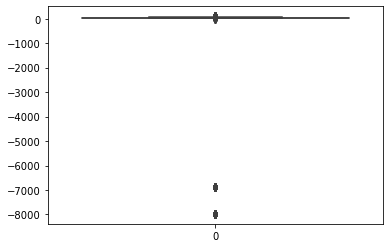

In [115]:
sns.boxplot(data = df['age'])
# 이상치 때문에 이상한 박스플롯 형태

In [116]:
# 나이 결측치를 0으로 바꾸기
df['age'].fillna("0", inplace=True)

In [119]:
df['age'] = df['age'].astype('float')

In [120]:
# 마이너스 팔천살부터 열살미만까진 모두 0으로 대체
df.loc[df['age'] < 10,'age'] = 0

<AxesSubplot:>

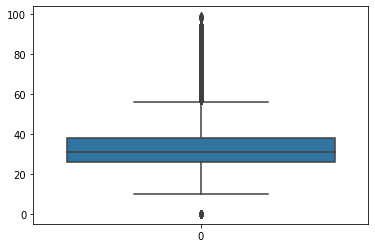

In [121]:
sns.boxplot(data = df['age'])
# 결측치, 이상치 대체 후 고르게 분포된 박스플롯

<AxesSubplot:xlabel='age', ylabel='Count'>

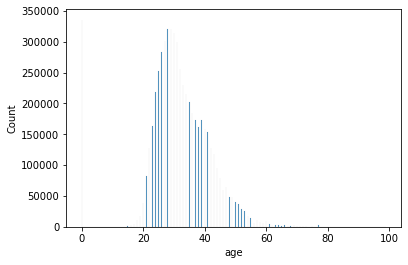

In [122]:
sns.histplot(data = df['age'])

In [123]:
df['age'].describe()
# 바뀐 기술통계 값
# 평균31세 중앙값31세

count   5880407
mean         31
std          11
min           0
25%          26
50%          31
75%          38
max          99
Name: age, dtype: float64

## 3.3 나이대 범주형 컬럼 추가

In [124]:
# 5세 단위로 분류하는 함수 제작
def generation(x) :
    if (x >= 15) and (x <25):
        return '15~24세'
    elif (x >= 25) and (x < 35):
        return '25~34세'
    elif (x >= 35) and (x < 45):
        return '35~44세'
    elif (x >= 45) :
        return '45세 이상'
    else:
        return '0~14세'

In [125]:
# 추후 다양한 분석 위해 나이대 컬럼 추가
df['generation'] = df['age'].apply(generation)

<AxesSubplot:xlabel='generation', ylabel='Percent'>

C:\Users\Yunmi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yunmi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yunmi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


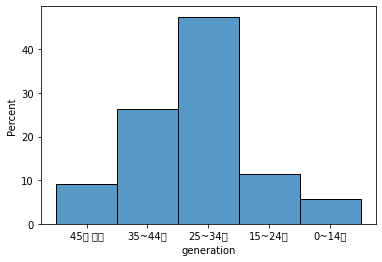

In [127]:
sns.histplot(data = df['generation'], stat = 'percent')
# 25-34세가 거의 절반, 그 후 뒤따르는 35-44세

## 3.3 가격대 범주형 컬럼 추가

In [128]:
# 사전조사 자료에 근거한 분류기준으로 가격대 분류하는 함수 제작
def price_range(x) :
    if x < 10000 :
        return '1만 미만'
    elif (x >= 10000) and (x < 30000):
        return '1만 이상~3만 미만'
    elif (x >= 30000) and (x < 50000):
        return '3만 이상~5만 미만'
    elif (x >= 50000) and (x < 100000):
        return '5만 이상~10만 미만'
    elif (x >= 100000) and (x < 200000):
        return '10만 이상~20만 미만'
    elif (x >= 200000) and (x < 300000):
        return '20만 이상~30만 미만'
    else:
        return '30만 이상'

In [129]:
# 추후 다양한 분석 위해 가격대 컬럼 추가
df['price_range'] = df['price'].apply(price_range)

<AxesSubplot:xlabel='price_range', ylabel='Percent'>

C:\Users\Yunmi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yunmi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yunmi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Yunmi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


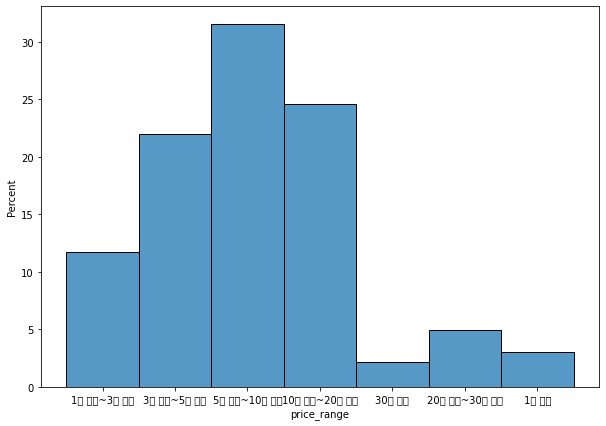

In [138]:
plt.subplots(figsize=(10, 7)) # 그래프 크기
sns.histplot(data = df['price_range'], stat = 'percent') # 그래프 그리기

# 4. 통합된 데이터 EDA
* 전처리 후 df 탐색

In [139]:
df.head(5)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,...,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,gender,age,generation,price_range
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243104100,하의,243104101,바지,13901,TOPTEN,F,53,45세 이상,1만 이상~3만 미만
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243104100,하의,243104101,바지,13901,TOPTEN,F,53,45세 이상,1만 이상~3만 미만
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243104100,하의,243104101,바지,13901,TOPTEN,F,53,45세 이상,3만 이상~5만 미만
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,243102100,상의,243102103,티셔츠,13901,TOPTEN,F,53,45세 이상,3만 이상~5만 미만
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,...,244101100,신발,244101112,슬리퍼,11481,LASLOW,F,53,45세 이상,5만 이상~10만 미만


In [140]:
df.shape

(5880407, 28)

## 4.1 구매 많은 카테고리

In [144]:
df[(df['event_name']=='purchase_success')]['category1_name'].value_counts()

의류          233813
잡화          116215
생활/건강        34087
가구/인테리어      18782
디지털/가전       17896
화장품/미용       15125
컬처           11349
식품            8954
스포츠/레저        5613
반려동물          1463
성년의날           972
키즈             938
홈_OLD           45
패션잡화_OLD         1
Name: category1_name, dtype: int64

## 4.2 세션을 구매 많은 순으로 정렬

In [141]:
df[(df['event_name'] == 'purchase_success')]['session_id'].value_counts()

85757a759ed013edf1a68050f6c174c1    177
90a786e737fa6cfab77a59a8a0026a55     99
f7048a0622bf03ef01b00a9996c3ef08     75
579a4be643801c72f0c8f1e045a997b4     70
6f1f602764cd2cf6dc877d9899372413     69
                                   ... 
997f815adc92d846a71de0b358069203      1
ba1a63c3704f352f5e3723ced245a86a      1
e05d0e44ad1b30121edd32be265bf8be      1
264edf69cef1708f51414952642bb3e8      1
628dd6aff94d030bfd147b0519677b9c      1
Name: session_id, Length: 255429, dtype: int64

## 4.3 유저를 구매 많은 순으로 정렬

In [143]:
df[(df['event_name'] == 'purchase_success')]['user_no'].value_counts()

b2xZVfUtjyGsZckO7j6zkg==    253
anAN3a+fvEnnvFdQ61+Egw==    203
QYfrbtFOWrk6s0kyW/HAtQ==    160
NNQiP/5+hZPlrcm/raV6gg==    134
S5rrjhjiYmOBfYlCTCitoQ==    132
                           ... 
IG4uluEaCRLe5Osu+7iHBQ==      1
vThx2bucPA7BUlzGleLbFA==      1
eNVbf+RfKk5DAqaMhOnmgw==      1
vCDnscFWVDSiyTUSzHrfnA==      1
vrE4nCVISqKLZ59f+eGRfA==      1
Name: user_no, Length: 146904, dtype: int64

## 4.4 최다구매 유저

In [146]:
# 최다구매 유저 (아이디 b2xZVfUtjyGsZckO7j6zkg==)
user1 = df[df['user_no'] == 'b2xZVfUtjyGsZckO7j6zkg==']

In [162]:
# 구매한 제품명과 제품수
user1['item_name'][user1['event_name']=='purchase_success'].value_counts()
# 같은 제품으로 최대 19개 수량 구매, 총 126가지 제품 구매

Palma cotton skirt (Ivory)                    19
Edie pocket pants (Coral beige)               14
Poco cotton short pants (Charcoal)            12
WIDE COLLAR KNIT - BLACK                      11
Classic office shirt (Coral beige)             7
                                              ..
[1차 리오더] straight banding pants JWSLLE4000     1
블랙 와이어리스 브라 팬티 세트                              1
21SS Silket Basic T-Shirts / white             1
MINI BROT [WASHED BEIGE]                       1
round balloon blouse_BEIGE                     1
Name: item_name, Length: 126, dtype: int64

In [152]:
print(user1.age.unique(), user1.gender.unique())
# 44세 여성

[44.] ['F']


In [147]:
user1['event_name'].unique()
# 장바구니나 찜을 안하고 바로 구매하는 편

array(['click_item', 'purchase_success'], dtype=object)

In [154]:
user1.region.value_counts()
# 주로 충청남도에서 접속

Chungcheongnam-do    7581
Seoul                 112
Gangwon-do             96
Busan                  69
Name: region, dtype: int64

# 5. 데이터 저장

In [ ]:
df.to_csv('C:/.../df_final', index = False)